In [1]:
!git clone https://github.com/amir-saniyan/HodaDatasetReader.git

Cloning into 'HodaDatasetReader'...
remote: Enumerating objects: 24, done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 24
Unpacking objects: 100% (24/24), done.


In [2]:
import matplotlib.pyplot as plt
from HodaDatasetReader.HodaDatasetReader import read_hoda_dataset

In [3]:
X_train, y_train = read_hoda_dataset('/content/HodaDatasetReader/DigitDB/Train 60000.cdb')
X_test, y_test = read_hoda_dataset('/content/HodaDatasetReader/DigitDB/Test 20000.cdb')

In [12]:
X_train.shape

(60000, 1024)

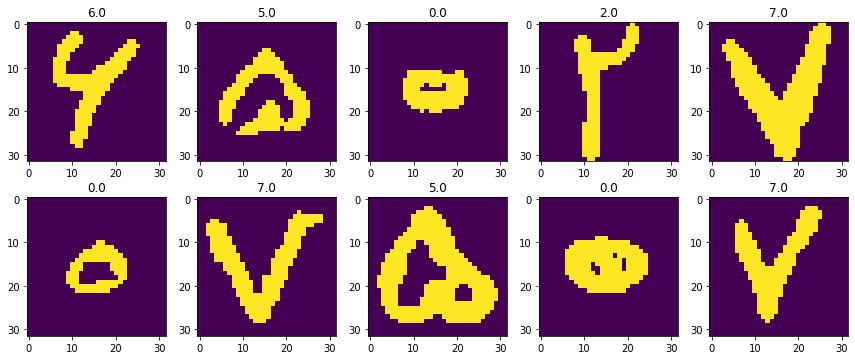

In [14]:
plt.figure(figsize=(12,5))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(X_train[i].reshape(32,32))
  plt.title(y_train[i])

plt.tight_layout()
plt.show() 

In [39]:
from sklearn.svm import SVC
from time import perf_counter
import numpy as np
start_tra = perf_counter()
hoda_svc = SVC(kernel='linear', C=np.inf)
hoda_svc.fit(X_train[:20000], y_train[:20000])
end_tra = perf_counter()
print(f'train phase time: ', round((end_tra-start_tra), 1))

train phase time:  26.8


In [40]:
start_ts = perf_counter()
print('acc:', round(hoda_svc.score(X_test, y_test), 2))
end_ts = perf_counter()
print(f'test phase time: ', round((end_ts-start_ts), 1))

acc: 0.93
test phase time:  52.4
